<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description-of-Dataset" data-toc-modified-id="Description-of-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description of Dataset</a></span></li><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prerequisites</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Global-parameters" data-toc-modified-id="Global-parameters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Global parameters</a></span></li></ul></li><li><span><a href="#Explorative-Data-Analysis" data-toc-modified-id="Explorative-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explorative Data Analysis</a></span><ul class="toc-item"><li><span><a href="#General-Properties" data-toc-modified-id="General-Properties-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>General Properties</a></span></li><li><span><a href="#Scale-Data" data-toc-modified-id="Scale-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scale Data</a></span></li><li><span><a href="#Class-distribution" data-toc-modified-id="Class-distribution-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Class distribution</a></span></li><li><span><a href="#Outlier-Analysis" data-toc-modified-id="Outlier-Analysis-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Outlier Analysis</a></span></li></ul></li><li><span><a href="#Create-a-subsample-of-the-data" data-toc-modified-id="Create-a-subsample-of-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create a subsample of the data</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Pandas-Profile" data-toc-modified-id="Pandas-Profile-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pandas Profile</a></span></li></ul></div>

# Detecting Credit Card Fraud

## Description of Dataset
The [dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, **we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC)**. Confusion matrix accuracy is not meaningful for unbalanced classification.

## Prerequisites

### Imports

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np

from sklearn.preprocessing import RobustScaler,StandardScaler     # Scaling
from sklearn.manifold import TSNE                  # Clustering / Dimensionality Reduction

# Visualization
import matplotlib.pyplot as plt
from matplotlib import cm as cm
%matplotlib inline

import seaborn as sns

### Global parameters

In [2]:
# Random seed for replicability
seed = 42

## Explorative Data Analysis

### General Properties

In [3]:
df = pd.read_csv("../data/creditcard.csv")
print(f"Rows: {df.shape[0]}")
print(f"Cols: {df.shape[1]}")
df.sample(5)

Rows: 284807
Cols: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
250996,155160.0,2.109017,0.028295,-2.410260,0.232724,0.924610,-0.995066,0.826068,-0.533862,0.367386,...,0.090419,0.450799,-0.242338,-0.938192,0.702172,-0.011330,-0.057583,-0.077789,38.95,0
201220,133781.0,-0.175486,0.619207,0.357776,-0.587758,0.529623,-0.115978,0.269298,0.023464,0.685569,...,0.165735,1.011285,-0.055884,0.734554,-0.851521,0.395597,0.347977,0.040135,13.99,0
125666,77752.0,1.542243,-0.962229,0.289943,-1.405514,-1.378053,-0.818978,-0.917832,-0.225373,-1.816698,...,-0.237567,-0.293102,-0.010074,0.014076,0.434030,-0.184537,0.028983,0.017618,15.00,0
13006,22851.0,-0.058743,0.558476,0.583915,0.607417,1.539524,4.778817,-1.554582,-0.536208,1.569498,...,1.241132,-1.052589,-0.170445,0.936855,1.088399,-0.165623,0.230290,0.195295,29.99,0
212529,138898.0,1.978564,-0.123976,-0.696514,0.223279,-0.341497,-0.889591,-0.101901,-0.085741,0.747485,...,-0.376536,-1.052884,0.483737,-0.032118,-0.471776,-1.207987,0.025052,-0.042786,1.00,0


We have 248.807 transactions described by 28 principal components as well as the **Time**, **Amount** and **Class** of the transaction. The transactions are divided into **two classes: 0 (Normal) and 1 (Fraud).**

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The **Time** and **Amount** columns have to be scaled. Other columns might be too but their range is not so big and since they are the result of a PCA, they probably have been scaled before.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

The data contains only numerical features and no values are missing. We can verify this with the following line of code:

In [6]:
print(f"Missing values in DataFrame: {np.sum(df.isnull().values)}")

Missing values in DataFrame: 0


### Scale Data

In [7]:
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


### Class distribution
Normal transactions (Class=0) vs. fraudulent transactions (Class=1)

In [8]:
print("Distribution of target variable:\n")
print(f"No fraud: {round(df['Class'].value_counts(normalize = True)[0] * 100, 2)} %")
print(f"Fraud: {round(df['Class'].value_counts(normalize = True)[1] * 100, 2)} %")

Distribution of target variable:

No fraud: 99.83 %
Fraud: 0.17 %


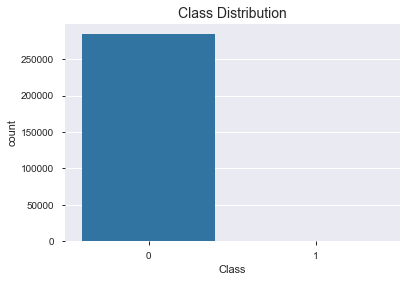

In [9]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution', fontsize=14)
plt.show()

The distribution of the target variable is heavily imbalanced.

### Outlier Analysis

In [10]:
colors = ["#0101DF", "#DF0101"]
figsize=(20,5)

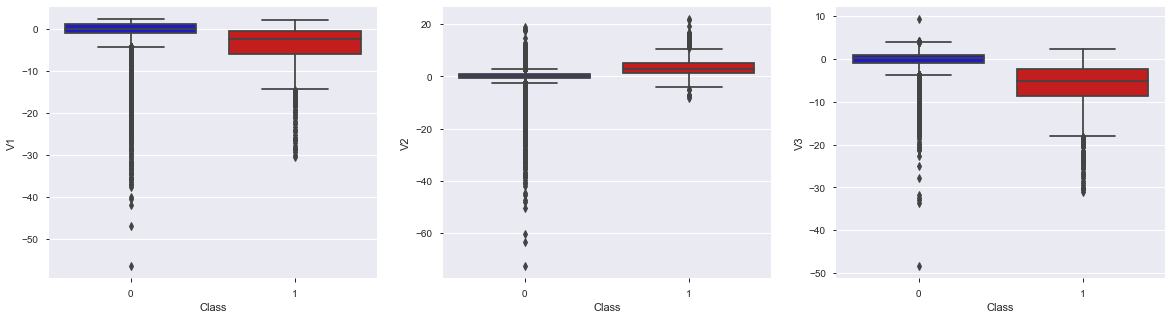

In [11]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V1", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V2", data=df, palette=colors, ax=axes[1])
sns.boxplot(x="Class", y="V3", data=df, palette=colors, ax=axes[2])
plt.show()

In [12]:
df = df[df.V1 > -40]
df = df[df.V2 > -50]
df = df[df.V3 > -45]
df = df[8 > df.V3]

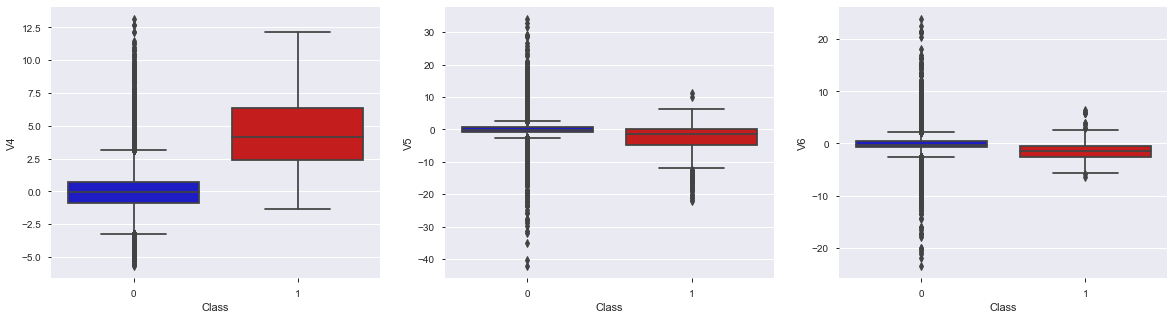

In [13]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V5", data=df, palette=colors, ax=axes[1])
sns.boxplot(x="Class", y="V6", data=df, palette=colors, ax=axes[2])
plt.show()

In [14]:
df = df[df.V5 > -35]
df = df[30 > df.V5]
df = df[df.V6 > -20]
df = df[20 > df.V6]

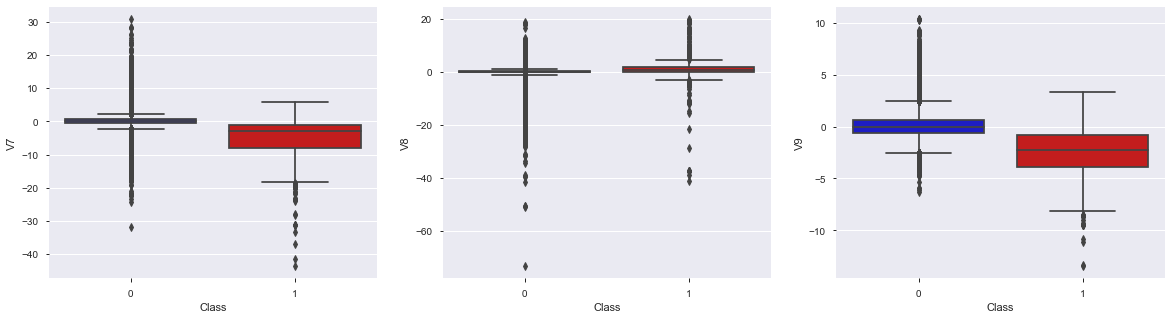

In [15]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V7", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V8", data=df, palette=colors, ax=axes[1])
sns.boxplot(x="Class", y="V9", data=df, palette=colors, ax=axes[2])
plt.show()

In [16]:
df = df[df.V8 > -45]

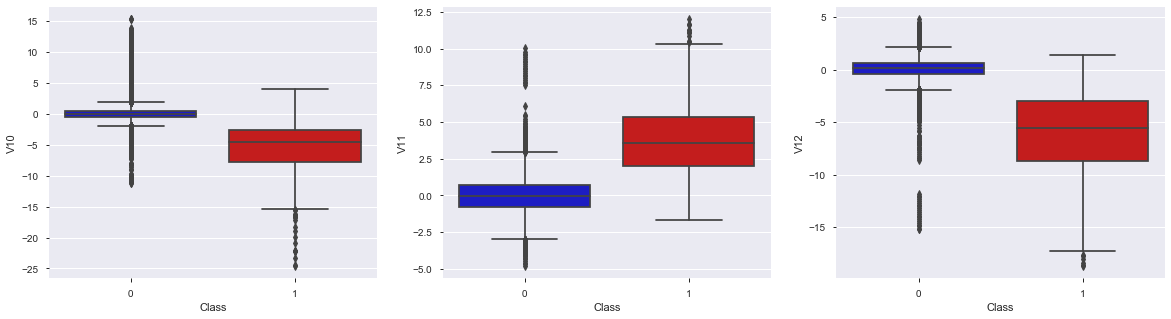

In [17]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[1])
sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[2])
plt.show()

In [18]:
df = df[15 > df.V10]

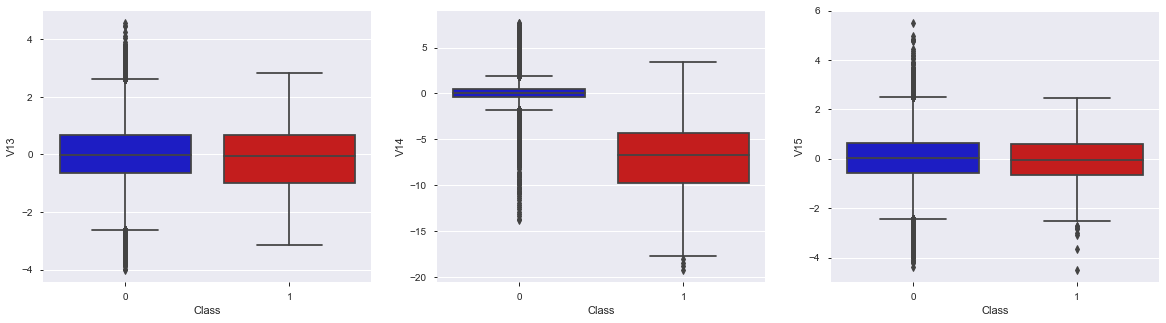

In [19]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V13", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
sns.boxplot(x="Class", y="V15", data=df, palette=colors, ax=axes[2])
plt.show()

In [20]:
df = df[5 > df.V15]

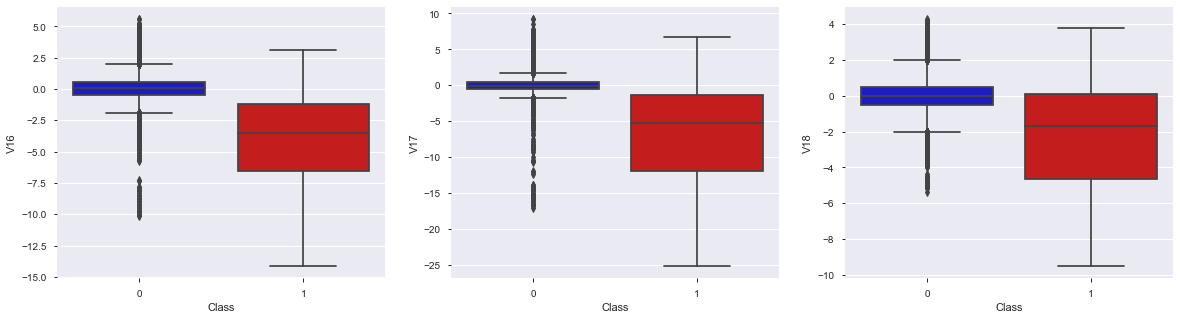

In [21]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V16", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[1])
sns.boxplot(x="Class", y="V18", data=df, palette=colors, ax=axes[2])
plt.show()

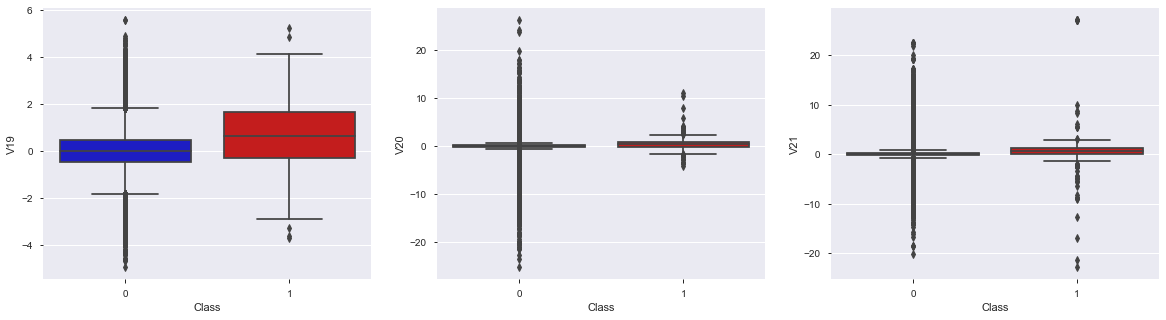

In [22]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V19", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V20", data=df, palette=colors, ax=axes[1])
sns.boxplot(x="Class", y="V21", data=df, palette=colors, ax=axes[2])
plt.show()

In [23]:
df = df[20 > df.V20]
df = df[df.V20 > -20]

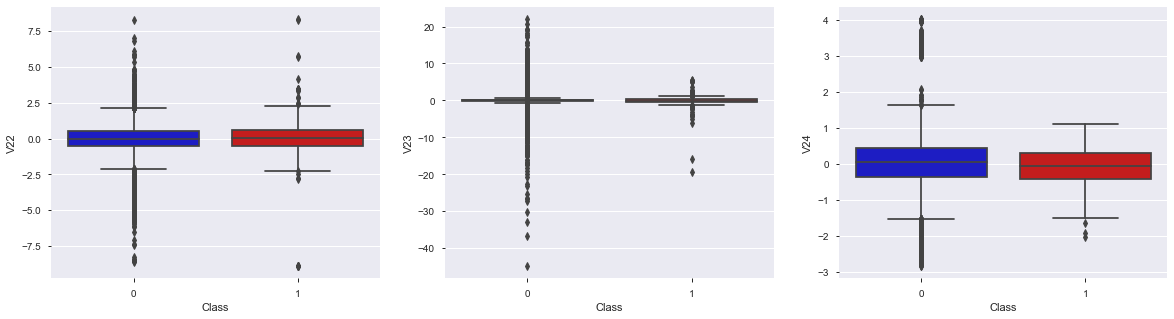

In [24]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V22", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V23", data=df, palette=colors, ax=axes[1])
sns.boxplot(x="Class", y="V24", data=df, palette=colors, ax=axes[2])
plt.show()

In [25]:
df = df[20 > df.V23]
df = df[df.V23 > -30]
df = df[2.5 > df.V24]

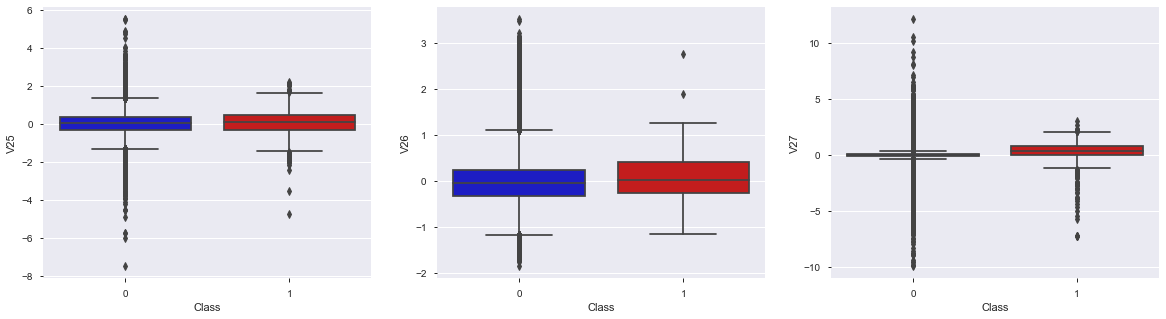

In [26]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V25", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V26", data=df, palette=colors, ax=axes[1])
sns.boxplot(x="Class", y="V27", data=df, palette=colors, ax=axes[2])
plt.show()

In [27]:
df = df[4 > df.V25]
df = df[df.V25 > -5]
df = df[3.5 > df.V26]
df = df[7.5 > df.V27]
df = df[df.V27 > -9]

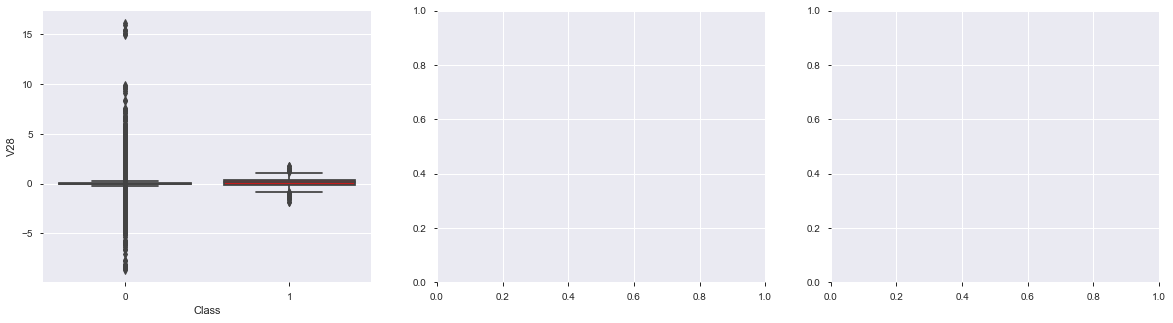

In [28]:
f, axes = plt.subplots(ncols=3, figsize=figsize)
sns.boxplot(x="Class", y="V28", data=df, palette=colors, ax=axes[0])
plt.show()

In [29]:
df = df[7.5 > df.V28]
df = df[df.V28 > -7.5]

## Create a subsample of the data
ref: "sampling.ipynb"

In [30]:
# Separate fraudulent and normal transactions
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

# Sample a sub set of the normal transactions
df_normal_sub = df_normal.sample(df_fraud.shape[0])

# Merge fraud cases and the normal cases subsample
df_sub = pd.concat([df_fraud, df_normal_sub]).sample(frac=1, random_state=seed)
df_sub.shape

(984, 31)

In [31]:
print("Distribution after sub-sampling:\n")
print(f"Normal transactions: {round(df_sub['Class'].value_counts(normalize = True)[0] * 100, 2)} %")
print(f"Fraudulent transactions: {round(df_sub['Class'].value_counts(normalize = True)[1] * 100, 2)} %")

Distribution after sub-sampling:

Normal transactions: 50.0 %
Fraudulent transactions: 50.0 %


## Correlations
For our correlations to make sense, we have to use the sample with equally distributed classes. Otherwise the correlations will be effected by the imbalance.

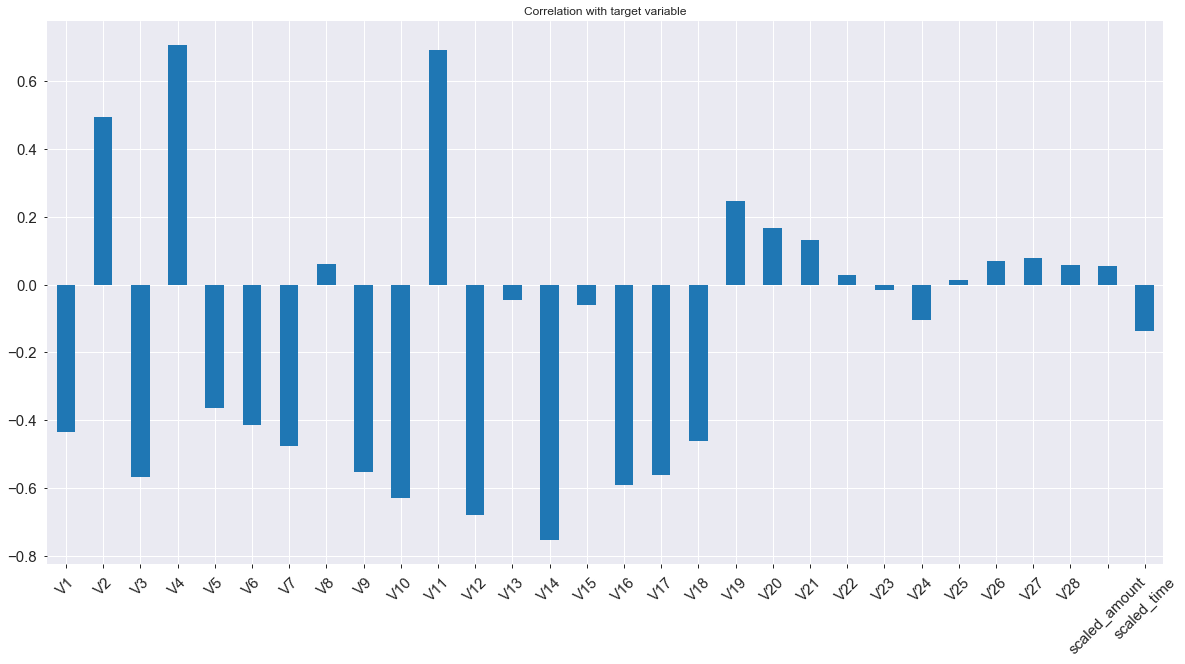

In [32]:
df_sub.drop('Class', axis=1).corrwith(df_sub.Class).plot.bar(
    figsize = (20, 10), title = "Correlation with target variable",
    fontsize = 15, rot = 45, grid = True)
plt.show()

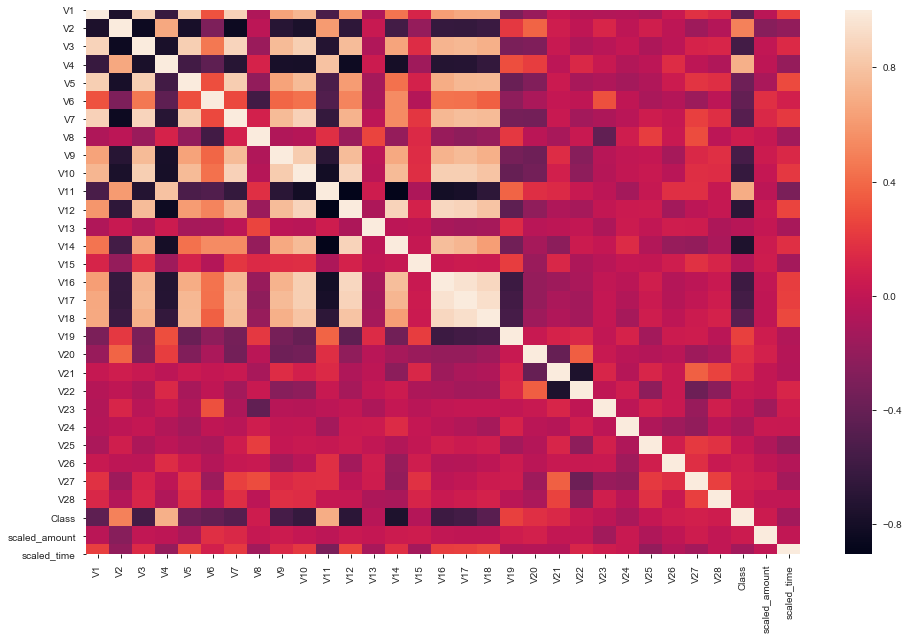

In [33]:
fig = plt.figure(figsize=(16, 10))
sns.heatmap(df_sub.corr())
plt.show()

## Pandas Profile

In [36]:
profile = df_sub.profile_report(title='Pandas Profiling Report')

In [37]:
profile.to_file(output_file="../reports/pandas_profiling.html")